In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

2024-05-03 19:39:05.282069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 19:39:05.282286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 19:39:05.433289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Model

In [2]:
cnn = tf.keras.models.load_model("/kaggle/input/fruitveg-rec-model/tensorflow2/fvrec/1/trained_model.h5")

# Visualization & Performing Prediction on Single Image

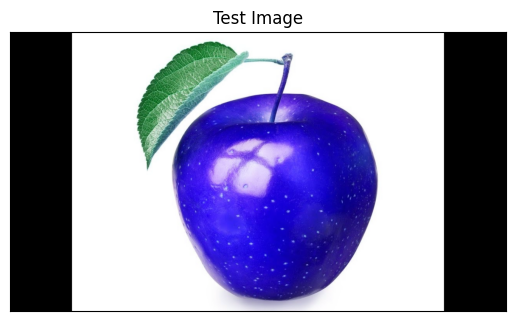

In [3]:
import cv2
image_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_2.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [4]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

In [5]:
predictions = cnn.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
[[1.0000000e+00 1.7714686e-28 1.3097479e-26 2.5258857e-19 0.0000000e+00
  2.3434043e-22 9.2508811e-25 2.2000395e-37 1.0341681e-20 7.1399596e-35
  6.4836620e-30 7.1532544e-30 7.0852284e-29 1.0761177e-31 4.9918517e-38
  1.3571592e-29 7.2190471e-37 1.5709540e-30 6.0181116e-29 3.9350753e-38
  4.9972713e-27 8.3455954e-24 1.8015042e-32 3.6515685e-18 0.0000000e+00
  2.1294268e-28 4.2247739e-26 3.8481831e-26 1.1891523e-30 0.0000000e+00
  2.6471383e-32 0.0000000e+00 6.3467372e-33 4.2032999e-25 2.3305265e-26
  8.8521419e-24]]


In [6]:
print(max(predictions[0]))

1.0


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 359 files belonging to 36 classes.


In [8]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0])

[0]


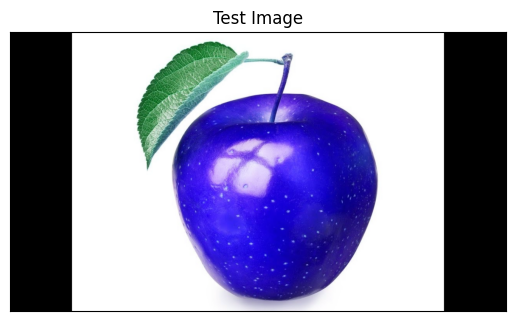

In [10]:
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
# Single Prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a apple
